# Clustering Simulation Study
## DATA 401 - Fall 2017

In [1]:
import pandas as pd
import numpy as np
import time

# Data
from sklearn import datasets

# Clustering Algorithms
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)



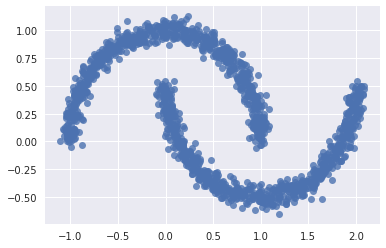

In [3]:
sns.regplot(noisy_moons[0][:,0], noisy_moons[0][:, 1], fit_reg=False)

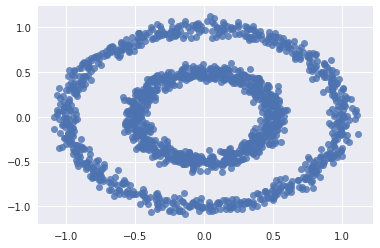

In [4]:
sns.regplot(noisy_circles[0][:,0], noisy_circles[0][:, 1], fit_reg=False)

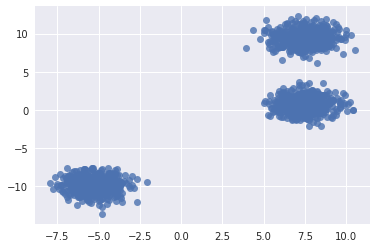

In [5]:
sns.regplot(blobs[0][:,0], blobs[0][:,1], fit_reg=False)

In [6]:
clustering_dictionary = {
                         'K-Means': KMeans(n_clusters=2), 
                         'Agglomerative': AgglomerativeClustering(linkage="average", affinity="cityblock", n_clusters=2), 
                         'Spectral': SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors"),
                         'GaussianMixture': GaussianMixture(n_components=2, covariance_type='full')
                        }

In [7]:
datasets = {
    'Moons' : noisy_moons,
    'Circles' : noisy_circles,
    'Blobs' : blobs
}

/opt/conda/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


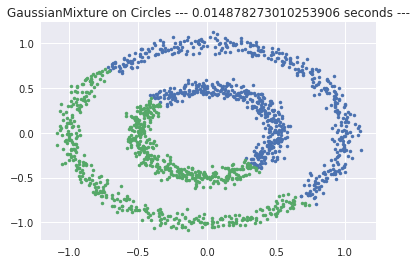

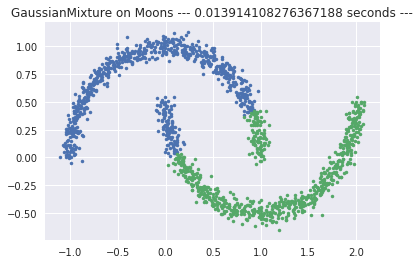

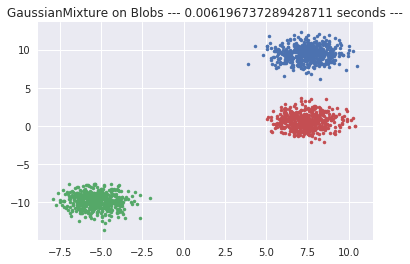

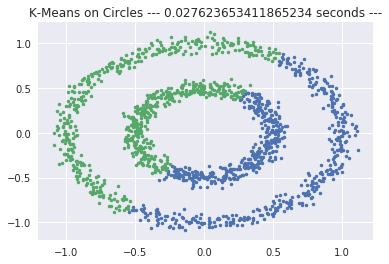

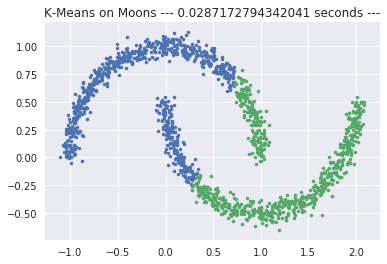

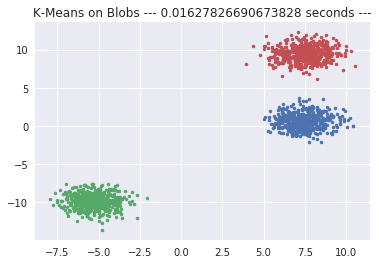

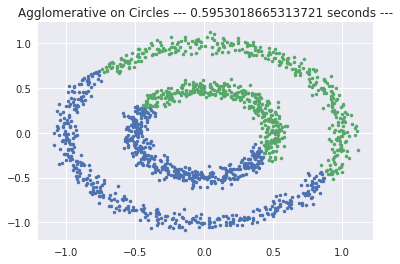

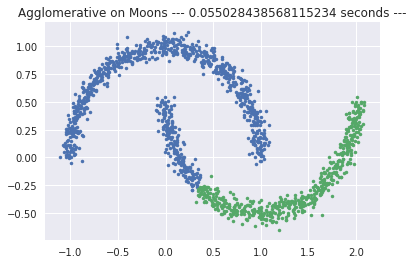

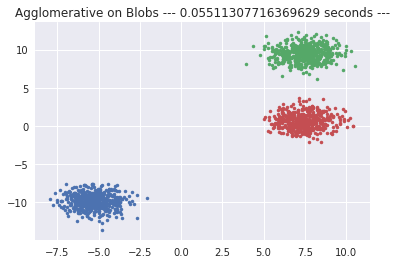

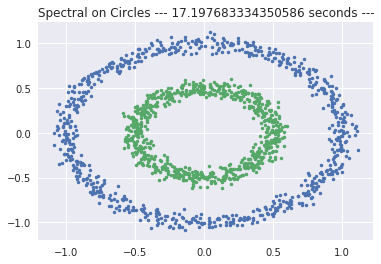

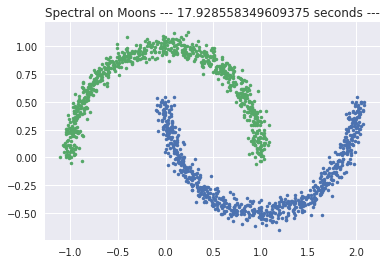

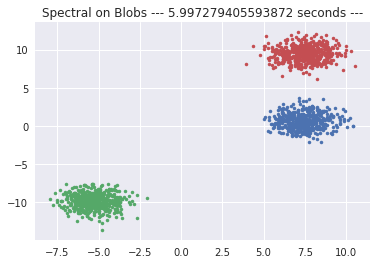

In [8]:
for key, value in clustering_dictionary.items():
    for d_key, d_value in datasets.items():
        df = pd.DataFrame(d_value[0])
        if (d_key == 'Blobs'):
            if (key == 'GaussianMixture'):
                value.n_components = 3
            else:
                value.n_clusters = 3
        else:
            if (key == 'GaussianMixture'):
                value.n_components = 2
            else:
                value.n_clusters = 2
        start_time = time.time()
        if (key == 'GaussianMixture'):
            fitted = value.fit(df)
            predicted = fitted.predict(df)
        else:
            predicted = value.fit_predict(df)
        end_time = time.time()
        df["predicted"] = predicted
        running_time = "--- %s seconds ---" % (end_time - start_time)
        if (d_key == 'Blobs'):  
            first = df[df["predicted"] == 0]
            second = df[df["predicted"] == 1]
            third = df[df["predicted"] == 2]
            plt.figure()
            title = key + " on " + d_key + " " + running_time
            plt.title(title)
            plt.plot(first[0], first[1], ".")
            plt.plot(second[0], second[1], ".")
            plt.plot(third[0], third[1], ".")
        else:
            first = df[df["predicted"] == 0]
            second = df[df["predicted"] == 1]
            plt.figure()
            title = key + " on " + d_key + " " + running_time
            plt.title(title)
            plt.plot(first[0], first[1], ".")
            plt.plot(second[0], second[1], ".")
